In [1]:
# Импорт стандартных модулей
import sys
import collections
from typing import List, Tuple

# Импорт сторонних библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
# decorators module


#------Decorators For EDA-------------------------------------------------------------------------------

def data_descr_decorator(f):
    def wrapper(df):
        print('View the data types and basic statistics before the pre-processing')
        res = f(df)
        print('Ready to proceed to the next stage...')
        return res
    return wrapper

def hist_decorator(f):
    def wrapper(df):
        print('View the data types and basic statistics before the pre-processing')
        res = f(df)
        print('Ready to proceed to the pre-processing...')
        return res
    return wrapper
    
def heatmap_decorator(f):
    def wrapper(df):
        print('This is a a heatmap as part of exploratory data analysis.')
        res = f(df)
        print('This is the end of the heatmap diagram...')
        return res
    return wrapper
    
def whisker_box_decorator(f):
    def wrapper(df):
        print('This is a whisker box diagram as part of exploratory data analysis..')
        res = f(df)
        print('The end of the whisker box diagram...')
        return res
    return wrapper

In [3]:
#EDA module

# Импорт стандартных модулей
import sys
import collections
from typing import List, Tuple

# Импорт сторонних библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import decor_module as d

#----------------------------------Show Types and Stats------------------------------------------------
@d.data_descr_decorator
def view_data(df):

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    print(df.info())
    print(df.describe())
    print(df.head())
    print(df.dtypes)
    return df


#-----------------------------------Histograms---------------------------------------------------------

@d.hist_decorator
def plot_histogram(df):
    
    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn для красивых графиков
    sns.set(style="whitegrid")
    
    # Создание гистограмм для каждой числовой переменной
    df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
    
    # Добавление названий для каждого графика и осей
    for ax in plt.gcf().get_axes():
        ax.set_xlabel('Значение')
        ax.set_ylabel('Частота')
        ax.set_title(ax.get_title())
        #ax.set_title(ax.get_title().replace('wine_class', 'Класс вина'))
    
    # Регулировка макета для предотвращения наложения подписей
    plt.tight_layout()
    
    # Показать график
    plt.show()


#-------------------------------------Heatmaps----------------------------------------------------------
@d.heatmap_decorator
def plot_heatmap(df):
    
    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn
    sns.set(style="white")
    
    # Расчет корреляционной матрицы только для числовых данных
    numeric_df = df.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
    corr = numeric_df.corr()
    
    # Маска для отображения только нижней треугольной части матрицы (опционально)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Настройка цветовой палитры
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Создание тепловой карты
    plt.figure(figsize=(30, 16))
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    # Добавление заголовка
    plt.title('Тепловая карта корреляций', fontsize=20)
    
    # Показать график
    plt.show()


#------------------------------------WhiskerBox-----------------------------------------------------------
@d.whisker_box_decorator
def plot_whisker_box(df):

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    # Установка стиля Seaborn
    sns.set(style="whitegrid")
    
    # Предполагаем, что df — это ваш DataFrame
    # Создаем ящики с усами для каждой колонки в DataFrame
    plt.figure(figsize=(12, 50))
    
    # Перебираем каждый числовой столбец и создаем для него ящик с усами
    for index, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        plt.subplot((len(df.columns) // 3) + 1, 3, index + 1)
        sns.boxplot(y=df[column])
    
    plt.tight_layout()
    plt.show()



In [4]:
# ml_module.py
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import eda_module as eda
import decor_module as d

def load_data(file_path):
    """
    Загрузка данных из CSV файла.
    :param file_path: Путь к CSV файлу.
    :return: DataFrame с загруженными данными.
    """
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f'File not found at {file_path}')

        if file_path.endswith('.zip'):
            with zipfile.ZipFile(file_path, 'r') as zip_index:
                zip_files = zip_index.namelist()
                print(f'Files in zip {zip_files}')
                zip_file = zip_files[0]
                with zip_index.open(zip_file) as file:
                    return _load_by_extension(file_path, zip_file)
                    
        file_ext = os.path.splitext(file_path)[1].lower()

        return _load_by_extension(file_path, file_ext)

    except FileNotFoundError as e:
        print(f"File not found: {e}")

    except ValueError as e:
        print(f'Value error: {e}')

    except Exception as e:
        print(f'Undefined error: {e}')

    finally:
        print(f'Attempted data loading from file at {file_path}')


def _load_by_extension(file_path, file_ext):
    
    if file_ext == '.csv':
        return pd.read_csv(file_path)

    elif file_ext == '.json':
        return pd.read_json(file_path)

    elif file_ext == '.txt':
        return pd.read_txt(file_path, delimiter = '\t') # tab separation is assumed

    elif file_ext in ['.xlsx', '.xls']:
        return pd.read_excel(file_path)

    elif file_ext == '.parquet':
        return pd.read_parquet(file_path)

    else:
        raise ValueError(f'Unsupported file {file_ext}')
    

def preprocess_data(df, drop_columns, target_column):
    """
    Предобработка данных: разделение на признаки и целевую переменную, масштабирование признаков.
    :param df: DataFrame с данными.
    :param target_column: Имя столбца с целевой переменной.
    :return: Обработанные признаки, целевая переменная, препроцессор.
    """

    if df is None:
        print("Данные не загружены. Вызовите метод load_data().")
        return
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date', inplace = False)
    df = df.drop(columns = drop_columns) 
    df = df.dropna() # remove nan values
    df = df.drop_duplicates() # remove duplicates

    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(df)

    # imp = SimpleImputer(strategy = "most_frequent" )
    # imp.fit_transform(df)
    
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Определение числовых и категориальных признаков
    # numeric_features = ['', '', '']
    # categorical_features = ['', '', '']

    # # Создание препроцессора
    # numeric_transformer = StandardScaler()
    # categorical_transformer = OneHotEncoder(drop='first')

    # preprocessor = ColumnTransformer(
    #     transformers=[
    #         ('num', numeric_transformer, numeric_features),
    #         ('cat', categorical_transformer, categorical_features)
    #     ])

    # Применение препроцессора к данным
    X_processed = X
    print("Данные успешно предобработаны.")
    
    return X_processed, y

def train_model(X, y):
    """
    Обучение модели линейной регрессии.
    :param X: Признаки.
    :param y: Целевая переменная.
    :return: Обученная модель.
    """
    """
    Обучение модели на обучающих данных.
    """
    if X is None or y is None:
        print("Данные не загружены или не предобработаны.")
        return

    try:
        model = LinearRegression()
        model.fit(X, y)
        print("Модель успешно обучена.")
        return model
    except Exception as e:
        print(f"Ошибка при обучении модели: {e}")

def predict(model, X):
    """
    Предсказание на новых данных.
    :param model: Обученная модель.
    :param X: Признаки.
    :return: Предсказанные значения.
    """
    return model.predict(X)

def evaluate_model(y_true, y_pred):
    """
    Оценка модели с использованием метрик MSE и R^2.
    :param y_true: Истинные значения.
    :param y_pred: Предсказанные значения.
    :return: MSE, R^2.
    """
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

Attempted data loading from file at financial_regression.csv
View the data types and basic statistics before the pre-processing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 n

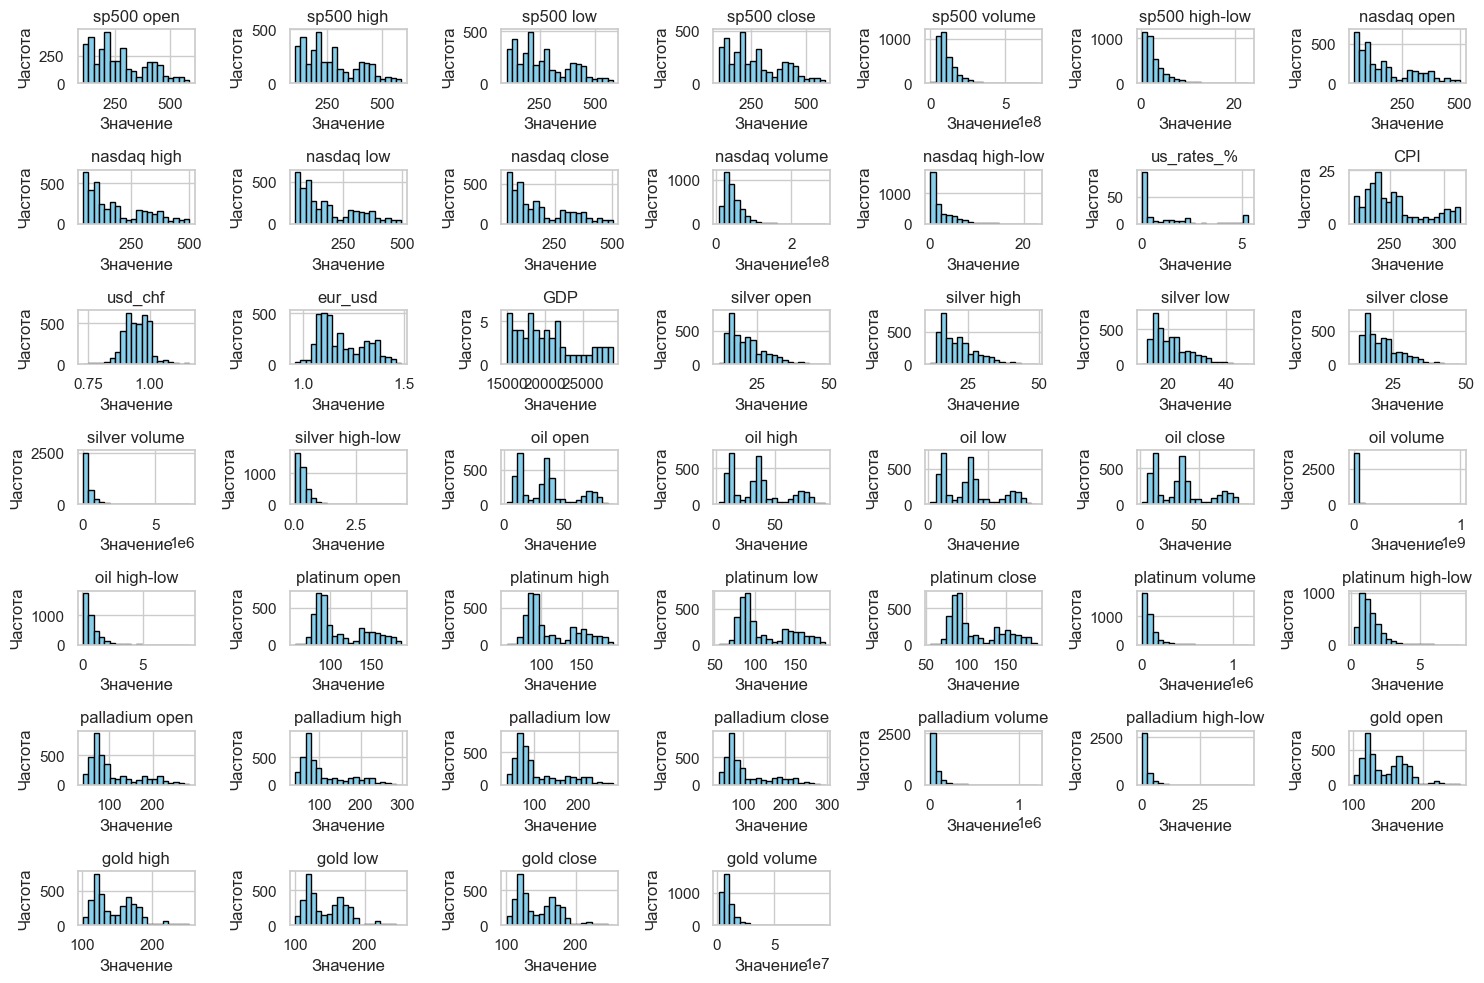

Ready to proceed to the pre-processing...
This is a a heatmap as part of exploratory data analysis.


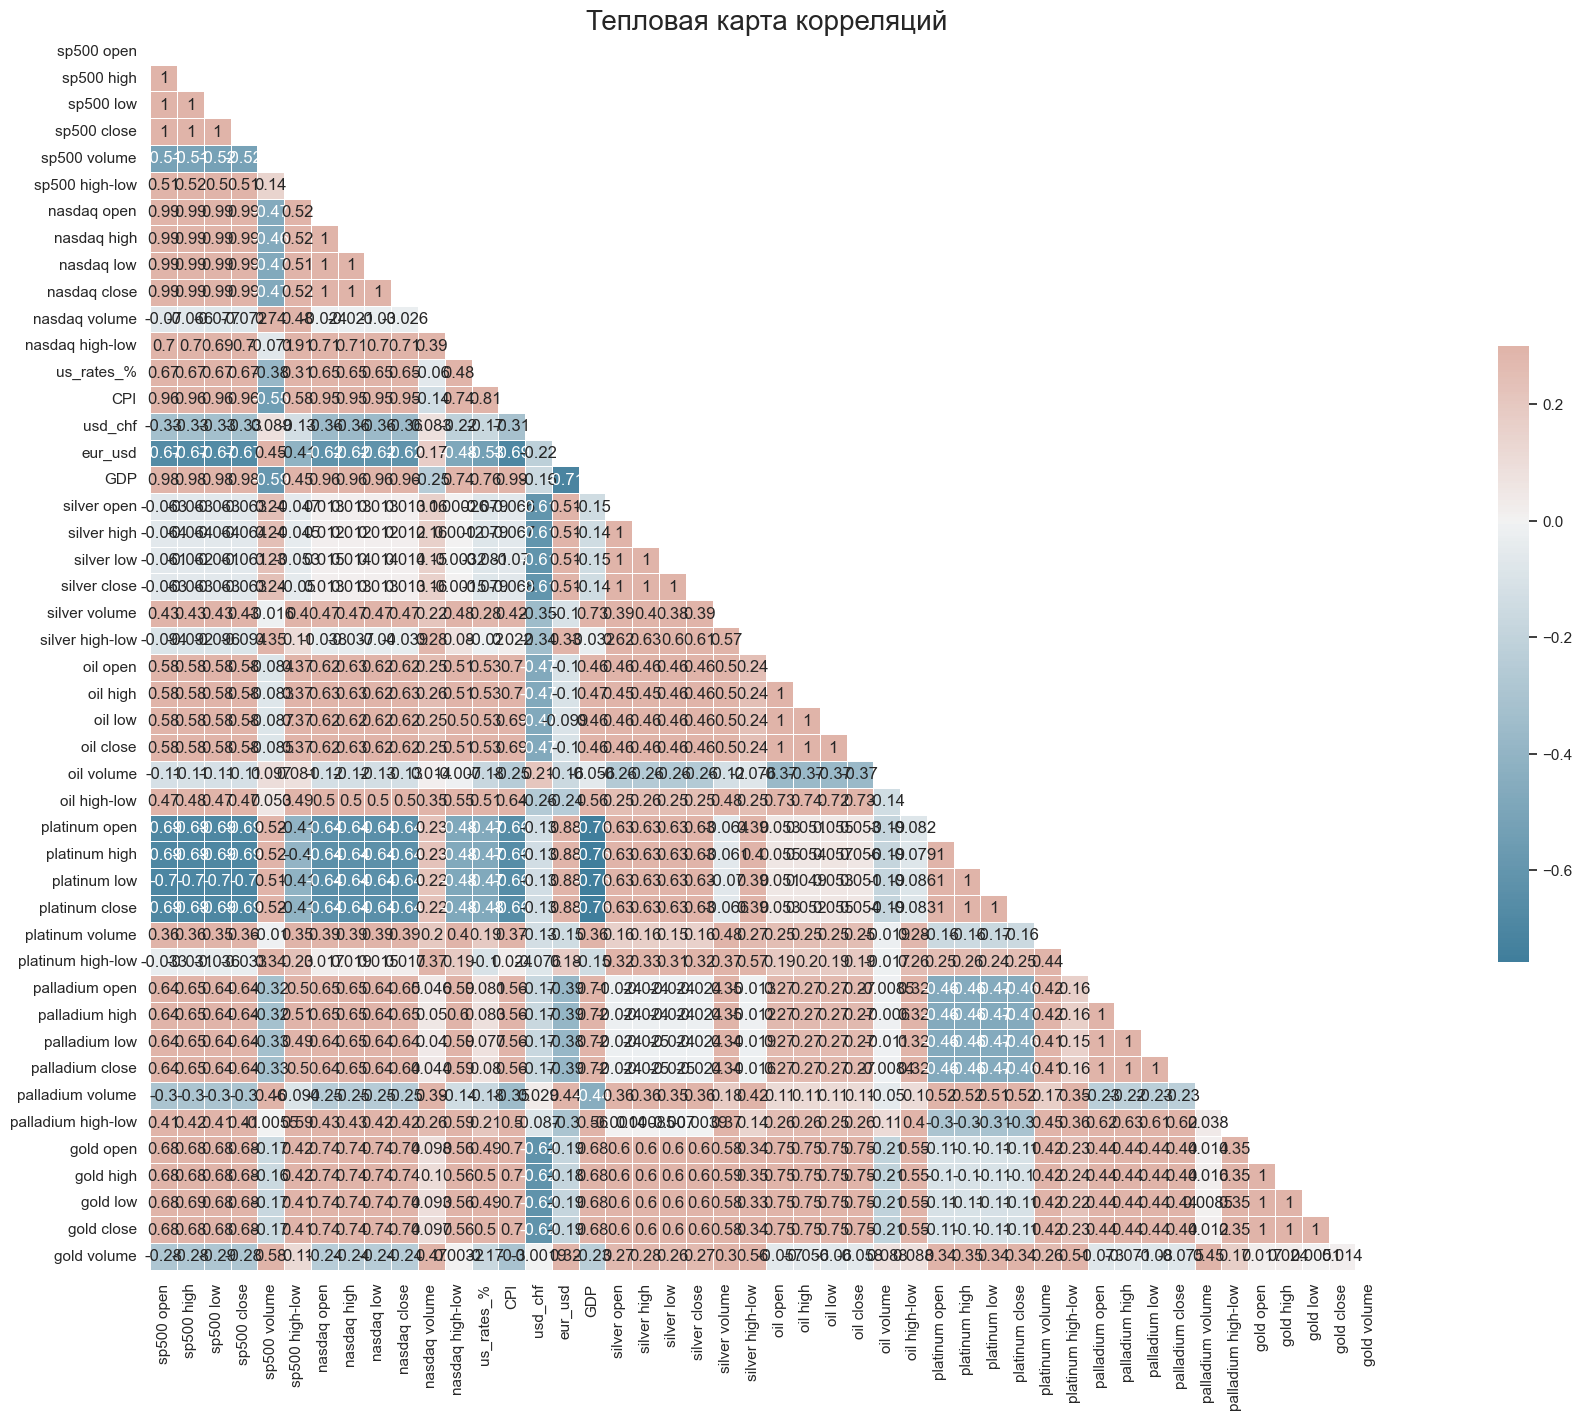

This is the end of the heatmap diagram...
This is a whisker box diagram as part of exploratory data analysis..


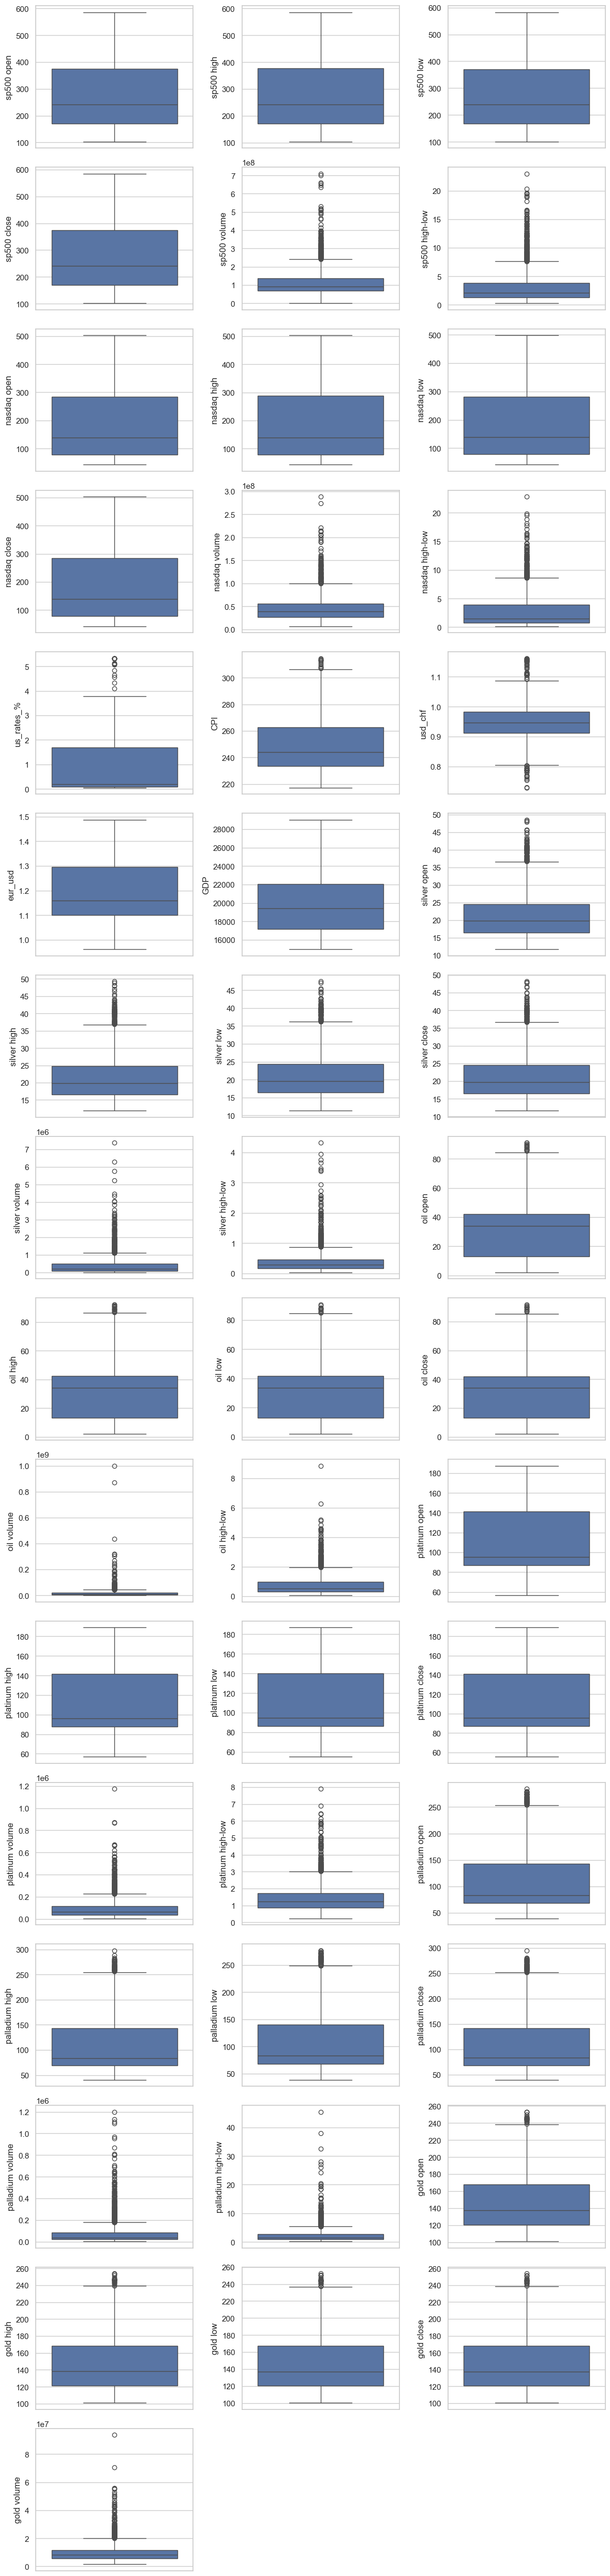

The end of the whisker box diagram...
Данные успешно предобработаны.
Модель успешно обучена.
Среднеквадратичная ошибка: 0.13
Коэффициент детерминации R^2: 1.00


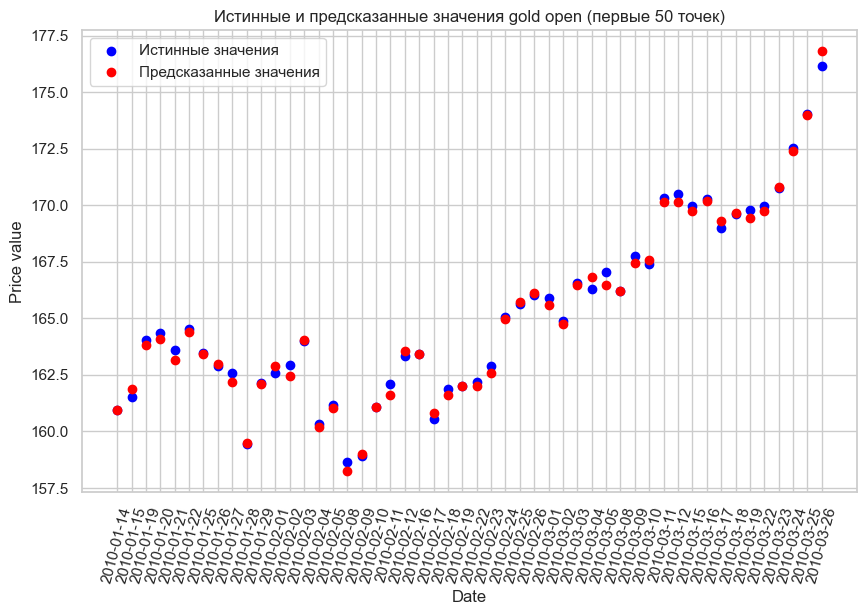

In [5]:
# main.py
import ml_module as ml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import eda_module as eda
import decor_module as d

# Загрузка данных
# Reference: https://www.kaggle.com/datasets/franciscogcc/financial-data
# #!/bin/bash
# curl -L -o ~/Downloads/financial-data.zip\                         
  # https://www.kaggle.com/api/v1/datasets/download/franciscogcc/financial-data

file_path = 'financial_regression.csv'  # Замените на путь к вашему CSV файлу
data = ml.load_data(file_path)

# EDA
eda.view_data(data)
eda.plot_histogram(data)
eda.plot_heatmap(data)
eda.plot_whisker_box(data)

# Предобработка данных
drop_columns = ["us_rates_%" , "CPI", "GDP"]
target_column = 'gold open'
X, y = ml.preprocess_data(data, drop_columns, target_column)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

# Обучение модели
model = ml.train_model(X_train, y_train)

# Предсказание на тестовых данных
y_pred = ml.predict(model, X_test)

# Оценка модели
mse, r2 = ml.evaluate_model(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

# Визуализация истинных и предсказанных значений
def plot_predictions(y_true, y_pred, num_points=50):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), y_true[:num_points], color='blue', label='Истинные значения')
    plt.scatter(range(num_points), y_pred[:num_points], color='red', label='Предсказанные значения')
    plt.xlabel('Date')
    plt.xticks(ticks = range(num_points), labels = X[:num_points].index.strftime('%Y-%m-%d'), rotation = 75)
    plt.ylabel('Price value')
    plt.title(f'Истинные и предсказанные значения {target_column} (первые {num_points} точек)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_test, y_pred)
